<a href="https://colab.research.google.com/github/vlochub/MIT-Xpro-colab/blob/main/Logistic_Regression_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic_Regression_Study

In [ ]:
df.head(6)



NameError: name 'df' is not defined

In [ ]:
###import necessary libraries
import numpy as np
import codecs
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as skl
import skimpy as skim
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from skimpy import skim
from google.colab import files

You can use the upload method mentioned below when you're working in Google Colab and want to upload a file from your local computer into the Colab environment for analysis or modeling.

In [ ]:
#You use this method when you're working in Google Colab (or any Python environment)
#and want to load a CSV file that’s already saved in your current working directory,
#typically under /content/.

df = pd.read_csv("/content/loans.csv")

print(df.columns)
display(df.head(6))
display(df.tail(6))

Index(['default', 'installment', 'log_income', 'fico_score', 'rev_balance',
       'inquiries', 'records'],
      dtype='object')


,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


,default,installment,log_income,fico_score,rev_balance,inquiries,records
9510,1,70,4.39,662,3.00,6,0
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


In [ ]:
categorical_columns = []
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [ ]:
# shows first 6 rows of dataframe
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


In [ ]:
df.tail(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
9510,1,70,4.39,662,3.00,6,0
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default        │   0 │      0 │    0.1598 │   0.3665 │      0 │      0 │      0 │      0 │     1 │ █    ▂  │  │
│ │ installment    │   0 │      0 │     320.1 │    207.1 │     16 │    164 │  269.5 │  435.2 │   940 │ ▇█▅▃▂▁  │  │
│ │ log_income     │   0 │      0 │     4.749 │    0.265 │   3.28 │   4.59 │   4.75 │    4.9 │  6.31 │   ▁█▆   │  │
│ │ fico_score     │   0 │      0 │     710.8 │    37.96 │    612 │    682 │    707 │    737 │   827 │ ▁▆█▅▃▁  │  │
│ │ rev_balance    │   0 │      0 │     16.99 │    33.72 │      0 │   3.27 │   8.69 │  18.36 │  1207 │    █    │  │
│ │ inquiries      │   0 │      0 │     1.573 │      2.2 │      0 │      0 │      1 │      2 │    33 │    █    │  │
│ │ records        │   0 │      0 │   0.06221 │   0.2624 │      0 │      0 │      0 │      0 │     5 │    █    │  │
│ └────────────────┴─────┴────────┴───────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
df[df.default == 1]

,default,installment,log_income,fico_score,rev_balance,inquiries,records
6,1,194,4.65,667,3.84,0,1
7,1,131,4.78,722,24.22,0,0
57,1,678,5.16,682,41.67,0,0
65,1,33,4.53,687,4.49,1,0
73,1,225,5.33,677,56.41,0,0
...,...,...,...,...,...,...,...
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0


<Axes: >

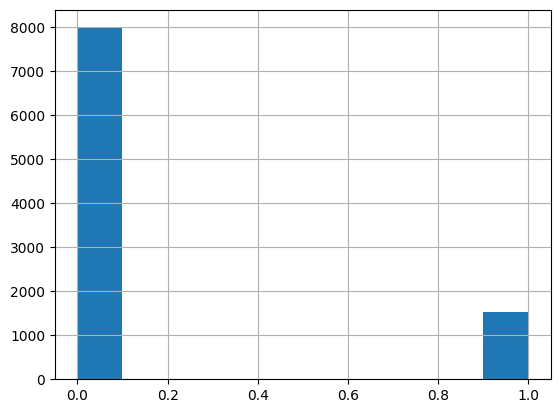

In [ ]:
df.default.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      9516 non-null   int64  
 1   installment  9516 non-null   int64  
 2   log_income   9516 non-null   float64
 3   fico_score   9516 non-null   int64  
 4   rev_balance  9516 non-null   float64
 5   inquiries    9516 non-null   int64  
 6   records      9516 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 520.5 KB


In [ ]:
skim(df[df['default']==0].reset_index(drop=True))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25    ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │   0 │      0 │         0 │        0 │      0 │      0 │     0 │      0 │     0 │     █   │  │
│ │ installment     │   0 │      0 │     315.5 │    203.4 │     16 │    163 │   268 │  425.5 │   940 │ ▇█▅▃▂▁  │  │
│ │ log_income      │   0 │      0 │     4.752 │   0.2607 │   3.28 │    4.6 │  4.75 │   4.91 │  6.31 │    █▆   │  │
│ │ fico_score      │   0 │      0 │     713.3 │    38.21 │    612 │    682 │   707 │    742 │   827 │  ▆█▆▃▁  │  │
│ │ rev_balance     │   0 │      0 │     16.18 │    29.54 │      0 │   3.25 │  8.63 │     18 │   952 │    █    │  │
│ │ inquiries       │   0 │      0 │     1.428 │    1.997 │      0 │      0 │     1 │      2 │    31 │    █    │  │
│ │ records         │   0 │      0 │   0.05654 │   0.2556 │      0 │      0 │     0 │      0 │     5 │    █    │  │
│ └─────────────────┴─────┴────────┴───────────┴──────────┴────────┴────────┴───────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
skim(df[df['default']==1].reset_index(drop=True))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA   ┃ NA %   ┃ mean       ┃ sd       ┃ p0    ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │    0 │      0 │          1 │        0 │     1 │      1 │     1 │     1 │     1 │     █   │  │
│ │ installment     │    0 │      0 │      344.3 │    224.1 │    16 │    169 │   290 │   492 │   927 │ ▆█▅▃▂▂  │  │
│ │ log_income      │    0 │      0 │      4.731 │   0.2863 │   3.3 │   4.56 │  4.73 │   4.9 │  5.85 │    ▄█▂  │  │
│ │ fico_score      │    0 │      0 │      697.9 │    33.76 │   617 │    672 │   692 │   717 │   822 │  ▁██▄▁  │  │
│ │ rev_balance     │    0 │      0 │      21.23 │    50.07 │     0 │    3.4 │  8.94 │  20.7 │  1207 │    █    │  │
│ │ inquiries       │    0 │      0 │      2.334 │    2.938 │     0 │      0 │     1 │     3 │    33 │   █▁    │  │
│ │ records         │    0 │      0 │    0.09204 │   0.2937 │     0 │      0 │     0 │     0 │     2 │  █  ▁   │  │
│ └─────────────────┴──────┴────────┴────────────┴──────────┴───────┴────────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## **Logistic Regression in Python**

Lets begin by splitting the data into a training set (on which we will train our model) and a test sert (on which we will evaulate it).

Lets skim the train and test data. You will notice -- as we hope -- that the two datasets have very similar statistics

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
skim(df_train)
skim(df_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6661   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %   ┃ mean       ┃ sd       ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │   0 │      0 │     0.1632 │   0.3696 │     0 │      0 │     0 │      0 │     1 │ █    ▂  │  │
│ │ installment     │   0 │      0 │      319.8 │    205.4 │    16 │    164 │   270 │    438 │   940 │ ▇█▅▃▂▁  │  │
│ │ log_income      │   0 │      0 │      4.745 │   0.2638 │   3.3 │   4.59 │  4.74 │    4.9 │  6.31 │   ▁█▆   │  │
│ │ fico_score      │   0 │      0 │      710.7 │    37.58 │   612 │    682 │   707 │    737 │   827 │ ▁▆█▅▃▁  │  │
│ │ rev_balance     │   0 │      0 │      17.05 │    35.33 │     0 │   3.33 │  8.72 │  18.27 │  1207 │    █    │  │
│ │ inquiries       │   0 │      0 │      1.565 │    2.213 │     0 │      0 │     1 │      2 │    32 │    █    │  │
│ │ records         │   0 │      0 │    0.06561 │   0.2708 │     0 │      0 │     0 │      0 │     5 │    █    │  │
│ └─────────────────┴─────┴────────┴────────────┴──────────┴───────┴────────┴───────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2855   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25     ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default        │   0 │      0 │     0.152 │   0.3591 │      0 │       0 │     0 │     0 │      1 │ █    ▁  │  │
│ │ installment    │   0 │      0 │     320.9 │    210.9 │     17 │     164 │   269 │   429 │    927 │ ▇█▄▃▂▁  │  │
│ │ log_income     │   0 │      0 │     4.757 │   0.2677 │   3.28 │    4.59 │  4.76 │  4.92 │   6.16 │    ▆█▁  │  │
│ │ fico_score     │   0 │      0 │     711.3 │    38.82 │    612 │     682 │   707 │   737 │    822 │  ▅█▆▃▁  │  │
│ │ rev_balance    │   0 │      0 │     16.85 │    29.62 │      0 │   3.115 │   8.6 │  18.5 │  394.1 │    █    │  │
│ │ inquiries      │   0 │      0 │     1.591 │    2.172 │      0 │       0 │     1 │     2 │     33 │    █    │  │
│ │ records        │   0 │      0 │   0.05429 │   0.2416 │      0 │       0 │     0 │     0 │      3 │    █    │  │
│ └────────────────┴─────┴────────┴───────────┴──────────┴────────┴─────────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### **Generate / Fit Model**

In [ ]:
print(df.columns)

Index(['default', 'installment', 'log_income', 'fico_score', 'rev_balance',
       'inquiries', 'records'],
      dtype='object')


In [ ]:
'''
The logistic regression results provide insights into the relationships between the dependent variable (transferred) and the
independent variable (First GPA).

'''

# build formula,
# formula="Transferred ~ Gender + Race + Ethnicity + Age + FirstGen + FirstGPA"
# formula="Transferred ~ Gender + Ethnicity + Age + FirstGen + FirstGPA"
# formula="Transferred ~ Gender + Ethnicity + FirstGen + FirstGPA"
# formula="Transferred ~ Ethnicity + FirstGen + FirstGPA"
# formula="Transferred ~ Ethnicity + FirstGPA"
from statsmodels.formula.api import logit
formula="default ~ installment + log_income + fico_score + rev_balance + inquiries + records"

# build model, fit the formula to the training data using a logistic algorithim (logit)
est = logit(formula=formula, data=df_train).fit()

# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.422664
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6654
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                 0.05002
Time:                        05:54:57   Log-Likelihood:                -2815.4
converged:                       True   LL-Null:                       -2963.6
Covariance Type:            nonrobust   LLR p-value:                 4.624e-61
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.3949      0.981      9.574      0.000       7.472      11.318
installment     0.0013    

In [ ]:
'''
Each row represents an observation in the test data, and the predicted_probability column shows the model's
estimated probability of default for each observation.

the model's predicted probability of default (predicted_probability).
'''

# apply the model (est) to the test data and make predictions
preds = est.predict(df_test)
df_test['predicted_probability'] = preds

# print top 6 predicted probabilities
df_test.head(10)


,default,installment,log_income,fico_score,rev_balance,inquiries,records,predicted_probability
0,0,25,4.54,777,19.90,0,0,0.058942
1,0,279,4.65,737,4.96,4,0,0.149843
2,0,547,4.81,707,12.25,1,0,0.173115
3,0,282,4.88,677,21.17,7,0,0.278510
4,0,131,4.16,672,3.61,1,0,0.239993
5,0,259,4.86,662,5.00,0,1,0.182592
6,0,204,4.49,737,6.73,0,0,0.105567
7,0,534,4.59,667,21.76,0,0,0.260771
8,0,238,4.84,762,15.18,0,0,0.065496
9,1,293,4.90,692,7.99,3,0,0.164125


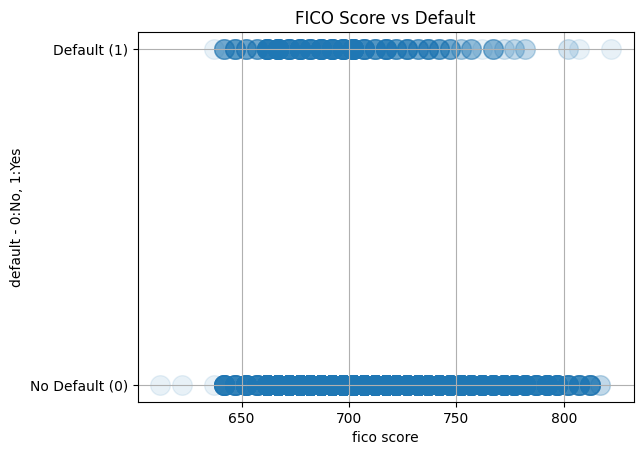

In [ ]:
# prompt: plot Transferred vs predicted_probability

import matplotlib.pyplot as plt

# Assuming df_ is the DataFrame you want to use for this plot.
# If you intended to use df_test, replace df_ with df_test
df_ = df_test # Or replace with the correct DataFrame if needed

plot_ = plt.scatter(df_['fico_score'],df_['default'], alpha=0.1, s=200)
plt.xlabel('fico score')
plt.ylabel('default - 0:No, 1:Yes')
plt.title('FICO Score vs Default') # Added a title for clarity
plt.yticks([0, 1], ['No Default (0)', 'Default (1)']) # Added labels for y-ticks
plt.grid(True) # Added grid for better readability
plt.show()

points_ = plot_.get_offsets()

# Assert that points_ is not empty
assert len(points_) > 0, "No points were retrieved from the plot."

In [ ]:
df_test['will_transfer'] = np.where(df_test['predicted_probability'] > 0.5, 1, 0)

In [ ]:
true_pos = ((df_test['default'] == 1) & (df_test['will_transfer'] == 1)).sum()
false_pos = ((df_test['default'] == 0) & (df_test['will_transfer'] == 1)).sum()
false_neg = ((df_test['default'] == 1) & (df_test['will_transfer'] == 0)).sum()
true_neg = ((df_test['default'] == 0) & (df_test['will_transfer'] == 0)).sum()

true_pos = 287
false_pos = 159
false_neg = 279
true_neg = 1385

true_pos = 48
false_pos = 18
false_neg = 22
true_neg = 91

total = true_pos + false_pos + false_neg + true_neg

print(true_pos, false_pos, false_neg, true_neg)

acc_rate = (true_pos + true_neg) / total # the probability the model correctly categorizes a data point
error_rate = (false_pos + false_neg) / total # the probability the model incorrectly categorizes a data point

true_pos_rate = true_pos / (true_pos + false_neg) # the probability the model correctly categorizes a data point given it's positive
false_pos_rate = false_pos / (true_neg + false_pos) # the probability the model incorrectly categorizes a data point given it's negative

print(f'Accuracy:{100.0*acc_rate:.3f}%', f'Error:{100.0*error_rate:.3f}%')
print(f'{100.0*true_pos_rate:.3f}%', f'{100.0*false_pos_rate:.3f}%')


48 18 22 91
Accuracy:77.654% Error:22.346%
68.571% 16.514%


### **Evaluate Model**

In [ ]:
from skimpy import skim
skim(df_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2855   │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column              ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ default             │  0 │    0 │    0.152 │  0.3591 │      0 │      0 │      0 │      0 │      1 │ █    ▁ │  │
│ │ installment         │  0 │    0 │    320.9 │   210.9 │     17 │    164 │    269 │    429 │    927 │ ▇█▄▃▂▁ │  │
│ │ log_income          │  0 │    0 │    4.757 │  0.2677 │   3.28 │   4.59 │   4.76 │   4.92 │   6.16 │   ▆█▁  │  │
│ │ fico_score          │  0 │    0 │    711.3 │   38.82 │    612 │    682 │    707 │    737 │    822 │  ▅█▆▃▁ │  │
│ │ rev_balance         │  0 │    0 │    16.85 │   29.62 │      0 │  3.115 │    8.6 │   18.5 │  394.1 │   █    │  │
│ │ inquiries           │  0 │    0 │    1.591 │   2.172 │      0 │      0 │      1 │      2 │     33 │   █    │  │
│ │ records             │  0 │    0 │  0.05429 │  0.2416 │      0 │      0 │      0 │      0 │      3 │   █    │  │
│ │ predicted_probabili │  0 │    0 │   0.1619 │ 0.08055 │ 0.0136 │ 0.1081 │ 0.1497 │ 0.1992 │ 0.9272 │   █▅   │  │
│ │ ty                  │    │      │          │         │        │        │        │        │        │        │  │
│ │ will_transfer       │  0 │    0 │ 0.004904 │ 0.06987 │      0 │      0 │      0 │      0 │      1 │   █    │  │
│ └─────────────────────┴────┴──────┴──────────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯